<a href="https://colab.research.google.com/github/lkarjun/Data-Science-from-Scratch/blob/master/8%20Gradient%20Decend/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import List, Callable
import matplotlib.pyplot as plt

## Linear Algebra functions

In [31]:
import math

def subtract(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i - w_i for v_i, w_i in zip(v, w)   
           ]

def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i + w_i for v_i, w_i in zip(v, w)   
           ]

assert add([1,2,3], [4,5,6]) == [5,7,9], 'not expected data'


def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

assert scalar_multiply(2.0,[1,2,3]) == [2,4,6], 'didnot match the expected data'

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), 'len of vectors dont match'
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

assert dot([1,2,3], [4,5,6]) == 32

def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v))

def squared_distance(v: Vector, w: Vector) -> float:
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v,w))

# Estimating the Gradient

In [7]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
                        return (f(x+h) - f(x)) / h

def square(x: float) -> float:
  return x * x

def derivative(x: float) -> float:
  return 2 * x             

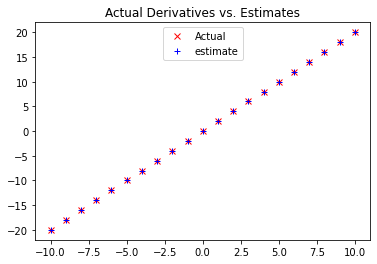


[-19.998999999984335, -17.998999999988996, -15.999000000007868, -13.999000000005424, -11.99900000000298, -9.999000000004088, -7.998999999999867, -5.998999999999199, -3.9989999999994197, -1.998999999999973, 0.001, 2.0009999999996975, 4.000999999999699, 6.000999999999479, 8.0010000000037, 10.001000000002591, 12.001000000005035, 14.00100000000748, 16.000999999988608, 18.000999999983947, 20.000999999993496]

[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [9]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'estimate')
plt.legend(loc = 9)
plt.show()

print();print(estimates);print();print(actuals)

In [17]:
Vector = List[float]

def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
                  
                  w = [v_j + (h if j == i else 0)
                        for j, v_j in enumerate(v)]
                  return (f(w)- f(v))/h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
  return [partial_difference_quotient(f, v, i, h)
          for i in range(len(v))]

In [25]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
  """Moves 'step-size' in the 'gradient' direction from 'v' """
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size, gradient)
  return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
  return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]


In [33]:
for epoch in range(1000):
  grad = sum_of_squares_gradient(v)
  v = gradient_step(v, grad, -0.01)
  print(epoch, v)

0 [8.016455578466773e-36, -5.346656646891902e-35, 6.96883101746519e-35]
1 [7.856126466897437e-36, -5.239723513954064e-35, 6.829454397115887e-35]
2 [7.699003937559489e-36, -5.134929043674983e-35, 6.692865309173569e-35]
3 [7.545023858808299e-36, -5.032230462801484e-35, 6.559008002990098e-35]
4 [7.394123381632134e-36, -4.931585853545454e-35, 6.427827842930296e-35]
5 [7.246240913999492e-36, -4.832954136474545e-35, 6.29927128607169e-35]
6 [7.101316095719502e-36, -4.7362950537450544e-35, 6.173285860350256e-35]
7 [6.959289773805112e-36, -4.641569152670153e-35, 6.049820143143251e-35]
8 [6.82010397832901e-36, -4.5487377696167503e-35, 5.928823740280386e-35]
9 [6.68370189876243e-36, -4.4577630142244154e-35, 5.810247265474779e-35]
10 [6.550027860787182e-36, -4.3686077539399273e-35, 5.694042320165283e-35]
11 [6.419027303571438e-36, -4.2812355988611287e-35, 5.580161473761977e-35]
12 [6.29064675750001e-36, -4.195610886883906e-35, 5.468558244286737e-35]
13 [6.164833822350009e-36, -4.111698669146228e-3

In [34]:
print(distance(v, [0,0,0]) < 0.001)

True
